In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [2]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

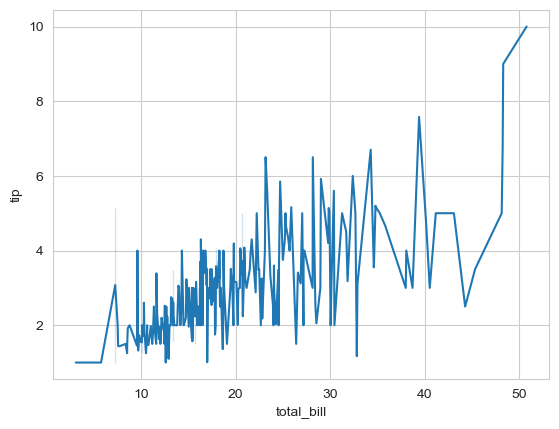

In [6]:
sns.lineplot(data=tips, # choose our dataset
x='total_bill',
y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

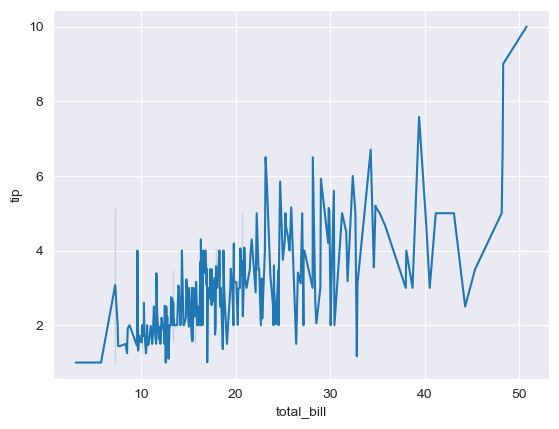

In [7]:
# Use premade styles
sns.set_style('darkgrid')

sns.lineplot(data=tips, 
x='total_bill',
y='tip')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

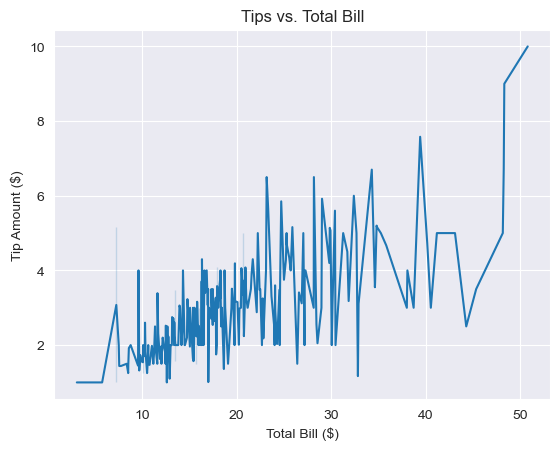

In [8]:
# Add title and axis labels
tipgraph = sns.lineplot(data=tips,
                        x='total_bill',
                        y='tip')

tipgraph.set(title='Tips vs. Total Bill', 
             xlabel='Total Bill ($)', 
             ylabel='Tip Amount ($)')

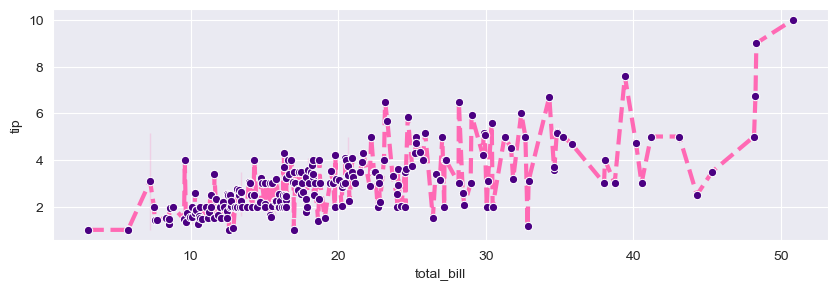

In [10]:
# Modify elements
fig = plt.subplots(figsize=(10, 3))

tipgraph = sns.lineplot(data=tips,
                        x='total_bill',
                        y='tip',
                        color = 'hotpink',
                        linestyle = '--',
                        linewidth = 3,
                        marker = 'o',
                        markerfacecolor = 'indigo')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

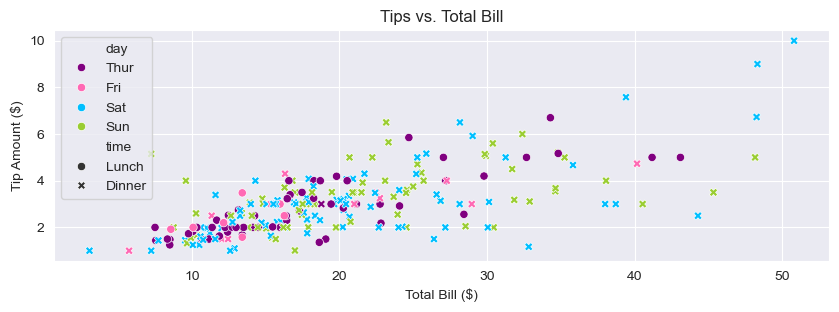

In [12]:
# Add multiple variables
fig = plt.subplots(figsize=(10, 3))
tipgraph = sns.scatterplot(data=tips, x='total_bill',
                           y='tip',
                           style = 'time', 
                           hue ='day',
                           palette = ['purple',
                                      'hotpink',
                                      'deepskyblue',
                                      'yellowgreen'])
tipgraph.set(title='Tips vs. Total Bill',
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)')

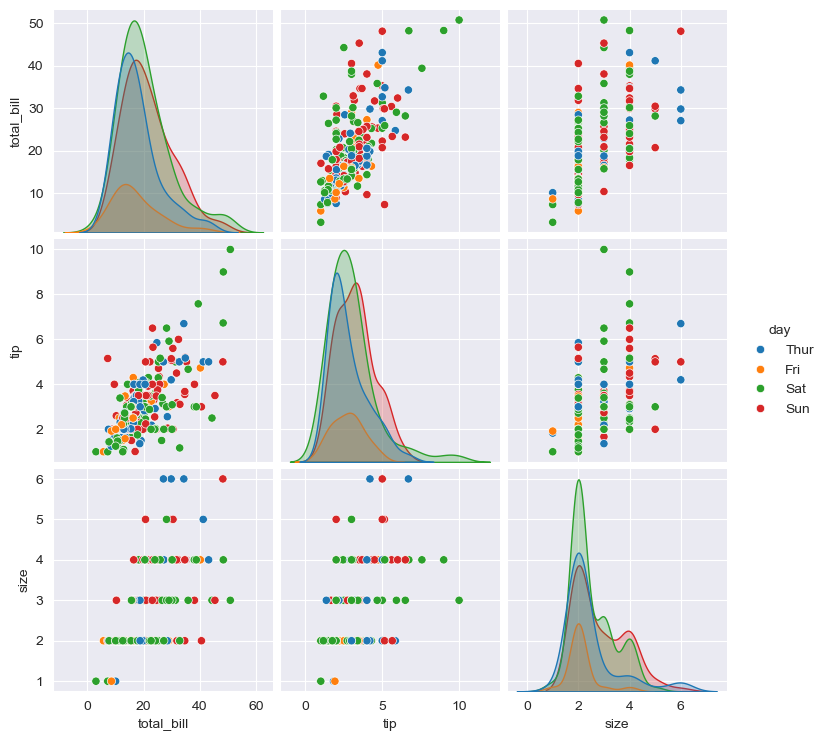

In [13]:
# Pairplot
sns.pairplot(data = tips, hue = 'day')


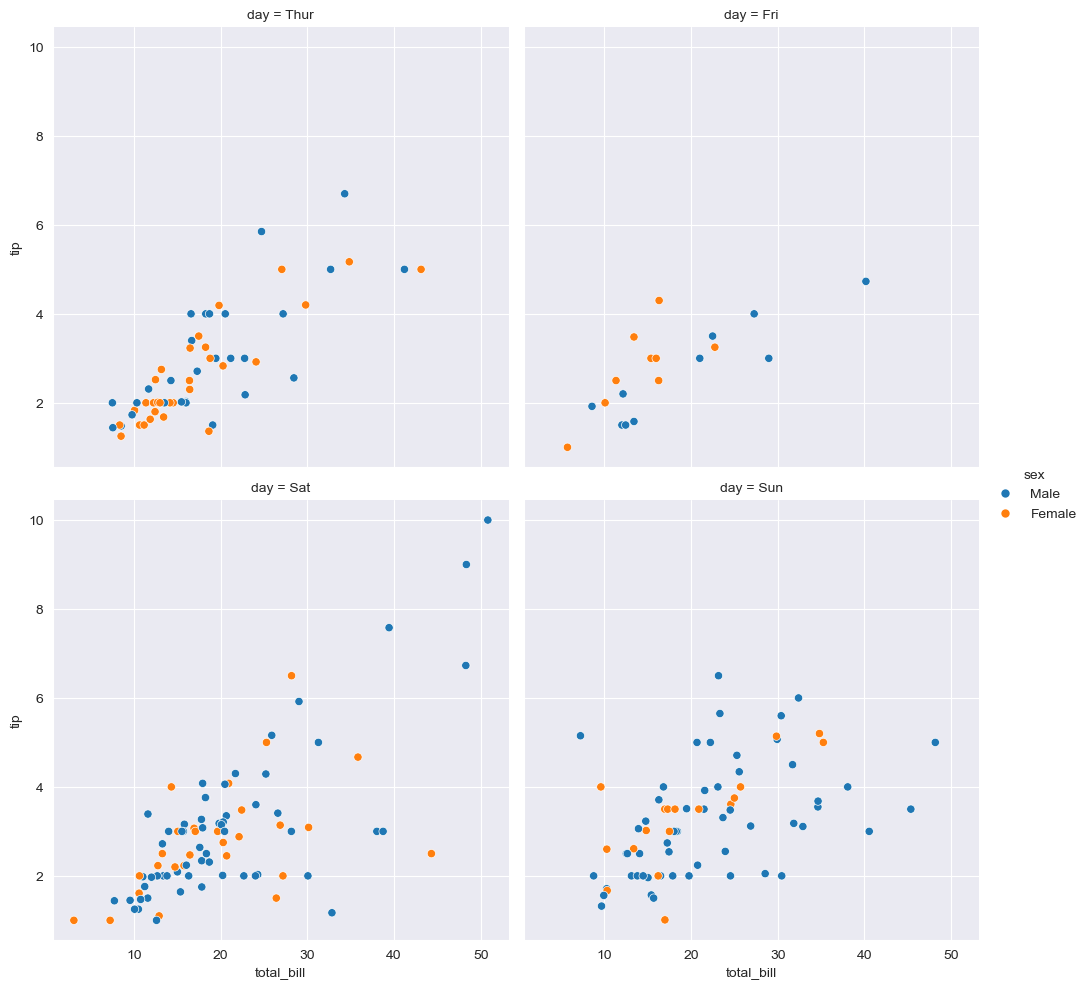

In [23]:
# Relplot
daysplot = sns.relplot(data=tips,
                       x="total_bill",
                       y="tip",
                       hue="sex",
                       col="day",
                       kind="scatter",
                       col_wrap=2)

In [4]:
import plotly.graph_objects as go
x1 = np.array(["Luffy","Zoro","Nami","Usopp","Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [5]:
# Making our plot
graph = go.Figure()

graph.add_trace(go.Bar(x=x1, y=y1))

graph.update_layout(title="Pirate Scores",
                    xaxis_title="Pirates",
                    yaxis_title="Score")
graph.show()

In [6]:
# Customizing plotly graphs
graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, 
                           y=y1, 
                           mode='markers',
                           marker=dict(
                               size=15,
                               color='hotpink',
                               opacity=1,
                               line=dict(width=5, color='purple'))))
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500, height=500)

In [ ]:
# Making wordclouds
from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
                 on_bad_lines='skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


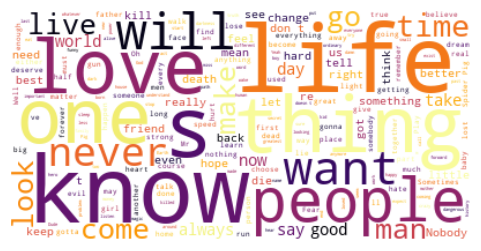

In [9]:
# join all the text from each row from the quote column into a string
text = " ".join(each for each in df.quote)
# generate wordcloud image
wordcloud = WordCloud(background_color= "white",
                      colormap = 'inferno').generate(text)

# use matplotlib syntax to put image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, interpolation='bilinear') 
ax.axis("off")

plt.show()

In [12]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

A = set(["apple", "banana", "watermelon"])
,
B = set(["pumpkin", "blueberry","apple","key lime"])

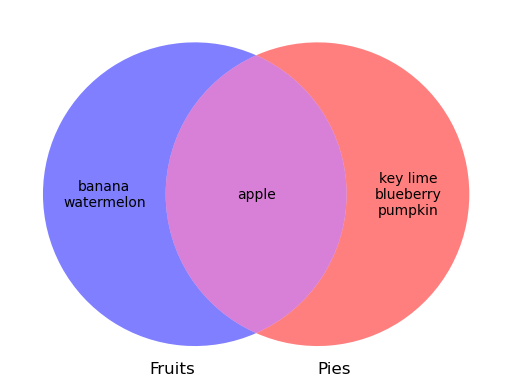

In [21]:
# Making venn diagrams
diagram = venn2_unweighted([A, B],
                           set_labels = ('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)

diagram.get_label_by_id("10").set_text("\n".join(A - B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))